In [1]:
import pandas as pd
import numpy as np
import time
import warnings

In [2]:
df = pd.read_excel('gs://unipopcorn/10y_5d_out_input_data_55_columns.xlsx', index_col='Date')

In [3]:
df[-5:]
#taking out last 5 days as they do not have classes
# df = df[5709:-5]
df = df[5:-5459]
df[:5]

Index  TenYearTsyYieldMid   ShiftUp     Delta  \
Date                                                       
29-Mar-19   6017            2.412112  2.502499  0.090387   
28-Mar-19   6016            2.385797  2.507957  0.122160   
27-Mar-19   6015            2.371768  2.516927  0.145159   
26-Mar-19   6014            2.412386  2.479475  0.067089   
25-Mar-19   6013            2.419508  2.495556  0.076048   

           GBP TSY OTR 10Y: Yield.Mid  DEM TSY OTR 10Y: Yield.Mid  \
Date                                                                
29-Mar-19                    1.000132                   -0.068934   
28-Mar-19                    0.992369                   -0.076824   
27-Mar-19                    0.985458                   -0.089661   
26-Mar-19                    1.011509                   -0.017552   
25-Mar-19                    1.013377                   -0.013446   

           FRF TSY OTR 1Y: Yield.Mid  JPY TSY OTR 10Y: Yield (Cls)  \
Date                                                                 
29-Mar-19                  -0.545214                        -0.080   
28-Mar-19                  -0.552870                        -0.084   
27-Mar-19                  -0.571759                        -0.083   
26-Mar-19                  -0.553836                        -0.060   
25-Mar-19                  -0.558655                        -0.090   

           FX EUR/USD: Price Spot (Cls)  FX USD/JPY: Price Spot (Cls)  ...  \
Date                                                                   ...   
29-Mar-19                        1.1220                    110.620003  ...   
28-Mar-19                        1.1247                    110.510002  ...   
27-Mar-19                        1.1264                    110.620003  ...   
26-Mar-19                        1.1311                    109.949997  ...   
25-Mar-19                        1.1312                    109.910004  ...   

           TIPS10YBREAKEVEN5DChange  Unnamed: 47  ShiftDown1  ShiftDown5  \
Date                                                                       
29-Mar-19                    -0.012      -2.4608    0.026315   -0.007396   
28-Mar-19                    -0.070       2.8511    0.014029   -0.067395   
27-Mar-19                    -0.123       3.6312   -0.040618   -0.165169   
26-Mar-19                    -0.102       1.7812   -0.007122   -0.124576   
25-Mar-19                    -0.066       2.3567   -0.033684   -0.190948   

           AverageYieldPast5  AverageYieldPast10  AverageDelta  AverageStdv5  \
Date                                                                           
29-Mar-19           2.400314            2.511411     -0.147491      0.031616   
28-Mar-19           2.408530            2.547805     -0.167138      0.062051   
27-Mar-19           2.438758            2.575668     -0.155217      0.061440   
26-Mar-19           2.471797            2.593975     -0.136885      0.075746   
25-Mar-19           2.511411            2.608682     -0.095846      0.063232   

           AverageStdv10  AverageStdv20  
Date                                     
29-Mar-19       0.093687       0.114800  
28-Mar-19       0.094518       0.109137  
27-Mar-19       0.083437       0.097736  
26-Mar-19       0.071990       0.086067  
25-Mar-19       0.056631       0.072453  

[5 rows x 55 columns]

In [4]:
# df.isna().sum()

In [5]:
# list(df)

In [6]:
#making a predictors list
features = [
    #'TenYearTsyYieldMid',
             #'ShiftUp',
             #'Delta',
             'GBP TSY OTR 10Y: Yield.Mid',
             'DEM TSY OTR 10Y: Yield.Mid',
             'FRF TSY OTR 1Y: Yield.Mid',
             'JPY TSY OTR 10Y: Yield (Cls)',
             'FX EUR/USD: Price Spot (Cls)',
             'FX USD/JPY: Price Spot (Cls)',
             'FX GBP/USD: Price Spot (Cls)',
             'GDP',
             'WJC',
             'NFP',
             'CPI',
             'GLD',
             'DXY',
             'PMI',
             'VIX',
             'SPX',
             'OIL',
             'LIBOR3M',
             'TIPS10YBREAKEVEN',
             '2-10SPREAD',
             'GrossIssue',
             'GrossRetir',
             'GBP TSY OTR 10Y: Yield.Mid5DChange',
             'DEM TSY OTR 10Y: Yield.Mid5DChange',
             'FRF TSY OTR 1Y: Yield.Mid5DChange',
             'JPY TSY OTR 10Y: Yield (Cls)5DChange',
             'FX EUR/USD: Price Spot (Cls)5DChange',
             'FX USD/JPY: Price Spot (Cls)5DChange',
             'FX GBP/USD: Price Spot (Cls)5DChange',
             'GDP5DChange',
             'WJC5DChange',
             'NFP5DChange',
             'CPI5DChange',
             'GLD5DChange',
             'DXY5DChange',
             'PMI5DChange',
             'VIX5DChange',
             'SPX5DChange',
             'OIL5DChange',
             'LIBOR3M5DChange',
             'TIPS10YBREAKEVEN5DChange',
             'Unnamed: 47',
             'ShiftDown1',
             'ShiftDown5',
             'AverageYieldPast5',
             'AverageYieldPast10',
             'AverageDelta',
             'AverageStdv5',
             'AverageStdv10',
             'AverageStdv20']

#output 
target = ['Direction']

In [7]:
x = df[features].copy()
y = df[target].copy()

Normalizing the data

In [8]:
x_stats = x.describe()
x_stats = x_stats.transpose()
x_stats

count           mean           std  \
GBP TSY OTR 10Y: Yield.Mid            558.0       1.315368      0.146808   
DEM TSY OTR 10Y: Yield.Mid            558.0       0.379748      0.147379   
FRF TSY OTR 1Y: Yield.Mid             558.0      -0.581435      0.040945   
JPY TSY OTR 10Y: Yield (Cls)          558.0       0.056267      0.041934   
FX EUR/USD: Price Spot (Cls)          558.0       1.153625      0.048634   
FX USD/JPY: Price Spot (Cls)          558.0     111.144552      2.124280   
FX GBP/USD: Price Spot (Cls)          558.0       1.311344      0.046688   
GDP                                   558.0       2.691039      0.715807   
WJC                                   558.0  231241.935484  15108.247282   
NFP                                   558.0     199.779570     72.597806   
CPI                                   558.0       2.202167      0.400258   
GLD                                   558.0     120.271996      4.109047   
DXY                                   558.0      95.130912      3.157339   
PMI                                   558.0      57.836201      1.850202   
VIX                                   558.0      14.146505      4.552103   
SPX                                   558.0    2611.675986    177.938804   
OIL                                   558.0      56.648244      6.833547   
LIBOR3M                               558.0       1.886297      0.605157   
TIPS10YBREAKEVEN                      558.0       1.970756      0.137015   
2-10SPREAD                            558.0      60.326611     34.633433   
GrossIssue                            558.0     186.997145     80.795272   
GrossRetir                            558.0     153.572100     89.622251   
GBP TSY OTR 10Y: Yield.Mid5DChange    558.0      -0.002036      0.071217   
DEM TSY OTR 10Y: Yield.Mid5DChange    558.0      -0.002063      0.059294   
FRF TSY OTR 1Y: Yield.Mid5DChange     558.0       0.001618      0.024677   
JPY TSY OTR 10Y: Yield (Cls)5DChange  558.0      -0.000891      0.016714   
FX EUR/USD: Price Spot (Cls)5DChange  558.0       0.000589      0.009857   
FX USD/JPY: Price Spot (Cls)5DChange  558.0      -0.048961      0.982770   
FX GBP/USD: Price Spot (Cls)5DChange  558.0       0.000654      0.013216   
GDP5DChange                           558.0       0.002867      0.236959   
WJC5DChange                           558.0    -247.311828   9465.411945   
NFP5DChange                           558.0      -0.268817     52.140152   
CPI5DChange                           558.0      -0.005670      0.101575   
GLD5DChange                           558.0       0.089122      1.418771   
DXY5DChange                           558.0      -0.049082      0.653923   
PMI5DChange                           558.0       0.000358      0.747443   
VIX5DChange                           558.0       0.010502      2.831616   
SPX5DChange                           558.0       4.044803     42.791379   
OIL5DChange                           558.0       0.000394      1.629148   
LIBOR3M5DChange                       558.0       0.011452      0.021919   
TIPS10YBREAKEVEN5DChange              558.0      -0.000930      0.035104   
Unnamed: 47                           558.0      -0.775975      4.120664   
ShiftDown1                            558.0      -0.000071      0.034949   
ShiftDown5                            558.0      -0.000407      0.068836   
AverageYieldPast5                     558.0       2.621919      0.303853   
AverageYieldPast10                    558.0       2.622380      0.303606   
AverageDelta                          558.0      -0.000512      0.062478   
AverageStdv5                          558.0       0.030945      0.014682   
AverageStdv10                         558.0       0.042469      0.017482   
AverageStdv20                         558.0       0.057972      0.020061   

                                                min            25%  \
GBP TSY OTR 10Y: Yield.Mid                 0.985458       1.200348   
DEM TSY OTR 10Y: Yiel

In [9]:
def norm(x):
  return (x - x_stats['mean']) / x_stats['std']

In [10]:
x_norm = norm(x)

In [11]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()

In [12]:
# pd.unique(y['Direction'])

In [13]:
direction_label = {
    'STRONG_HIGH' : 5, 
    'HIGH' : 4, 
    'FLAT' : 3,
    'LOW' : 2, 
    'STRONG_LOW' :1
}
df['Direction_label'] = df['Direction'].map(direction_label)

In [14]:
# le.fit(y['Direction'])
# y['Direction'] = le.transform(y['Direction'])

In [15]:
#making feature and target set


noTestingDays = 40

x_train = x_norm[:-noTestingDays]
x_test = x_norm[-noTestingDays:]

y_train = y[:-noTestingDays].values.ravel()
y_test = y[-noTestingDays:]

In [16]:
# y_test

In [17]:
#Loading classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
import xgboost

In [18]:
#creating list with the models, all default
models = [
        ("LogisticRegression",LogisticRegression()),
        ("SVC",SVC()),
        ("LinearSVC",LinearSVC()),
        ("KNeighbors",KNeighborsClassifier()),
        ("DecisionTree",DecisionTreeClassifier()),
        ("RandomForest",RandomForestClassifier()),
#         ("RandomForestBig",RandomForestClassifier(n_estimators=5000, criterion='gini',
#                                     max_depth=6, random_state=0, max_features=None)),
        ("MLPClassifier",MLPClassifier(solver='lbfgs', random_state=0)),
    
        ("MLPClassifier_opt",MLPClassifier(
                                        solver =  'sgd', 
                                        alpha = 0.1, 
                                        hidden_layer_sizes = (5, 5), 
                                        activation = 'tanh', 
                                        learning_rate = 'adaptive')
         
         
        )
    ]

In [19]:
# #training all the models
# #warnings.filterwarnings(action='once')
# warnings.filterwarnings('ignore')


##Creating different features sets

In [20]:
features_all = [
    #'TenYearTsyYieldMid',
             #'ShiftUp',
             #'Delta',
             'GBP TSY OTR 10Y: Yield.Mid',
             'DEM TSY OTR 10Y: Yield.Mid',
             'FRF TSY OTR 1Y: Yield.Mid',
             'JPY TSY OTR 10Y: Yield (Cls)',
             'FX EUR/USD: Price Spot (Cls)',
             'FX USD/JPY: Price Spot (Cls)',
             'FX GBP/USD: Price Spot (Cls)',
             'GDP',
             'WJC',
             'NFP',
             'CPI',
             'GLD',
             'DXY',
             'PMI',
             'VIX',
             'SPX',
             'OIL',
             'LIBOR3M',
             'TIPS10YBREAKEVEN',
             '2-10SPREAD',
             'GrossIssue',
             'GrossRetir',
             'GBP TSY OTR 10Y: Yield.Mid5DChange',
             'DEM TSY OTR 10Y: Yield.Mid5DChange',
             'FRF TSY OTR 1Y: Yield.Mid5DChange',
             'JPY TSY OTR 10Y: Yield (Cls)5DChange',
             'FX EUR/USD: Price Spot (Cls)5DChange',
             'FX USD/JPY: Price Spot (Cls)5DChange',
             'FX GBP/USD: Price Spot (Cls)5DChange',
             'GDP5DChange',
             'WJC5DChange',
             'NFP5DChange',
             'CPI5DChange',
             'GLD5DChange',
             'DXY5DChange',
             'PMI5DChange',
             'VIX5DChange',
             'SPX5DChange',
             'OIL5DChange',
             'LIBOR3M5DChange',
             'TIPS10YBREAKEVEN5DChange',
             'Unnamed: 47',
             'ShiftDown1',
             'ShiftDown5',
             'AverageYieldPast5',
             'AverageYieldPast10',
             'AverageDelta',
             'AverageStdv5',
             'AverageStdv10',
             'AverageStdv20']
features_lidia = [
    #'TenYearTsyYieldMid',
             #'ShiftUp',
             #'Delta',
             'GBP TSY OTR 10Y: Yield.Mid',
             'DEM TSY OTR 10Y: Yield.Mid',
             'FRF TSY OTR 1Y: Yield.Mid',
             'JPY TSY OTR 10Y: Yield (Cls)',
             'FX EUR/USD: Price Spot (Cls)',
             'FX USD/JPY: Price Spot (Cls)',
             'FX GBP/USD: Price Spot (Cls)',
             'GDP',
             'WJC',
             'NFP',
             'CPI',
             'GLD',
             'DXY',
             'PMI',
             'VIX',
             'SPX',
             'OIL',
             'LIBOR3M',
             'TIPS10YBREAKEVEN',
             '2-10SPREAD',
             'GrossIssue',
             'GrossRetir',
#              'GBP TSY OTR 10Y: Yield.Mid5DChange',
#              'DEM TSY OTR 10Y: Yield.Mid5DChange',
#              'FRF TSY OTR 1Y: Yield.Mid5DChange',
#              'JPY TSY OTR 10Y: Yield (Cls)5DChange',
#              'FX EUR/USD: Price Spot (Cls)5DChange',
#              'FX USD/JPY: Price Spot (Cls)5DChange',
#              'FX GBP/USD: Price Spot (Cls)5DChange',
#              'GDP5DChange',
#              'WJC5DChange',
#              'NFP5DChange',
#              'CPI5DChange',
#              'GLD5DChange',
#              'DXY5DChange',
#              'PMI5DChange',
#              'VIX5DChange',
#              'SPX5DChange',
#              'OIL5DChange',
#              'LIBOR3M5DChange',
#              'TIPS10YBREAKEVEN5DChange',
#              'Unnamed: 47',
#              'ShiftDown1',
#              'ShiftDown5',
#              'AverageYieldPast5',
#              'AverageYieldPast10',
#              'AverageDelta',
#              'AverageStdv5',
#              'AverageStdv10',
#              'AverageStdv20']  
]
features_baseline = [
            'TenYearTsyYieldMid',
             #'ShiftUp',
             #'Delta',
             'GBP TSY OTR 10Y: Yield.Mid',
             'DEM TSY OTR 10Y: Yield.Mid',
             'FRF TSY OTR 1Y: Yield.Mid',
             'JPY TSY OTR 10Y: Yield (Cls)',
             'FX EUR/USD: Price Spot (Cls)',
             'FX USD/JPY: Price Spot (Cls)',
             'FX GBP/USD: Price Spot (Cls)',
             'GDP',
             'WJC',
             'NFP',
             'CPI',
             'GLD',
             'DXY',
             'PMI',
             'VIX',
             'SPX',
             'OIL',
             'LIBOR3M',
             'TIPS10YBREAKEVEN',
             '2-10SPREAD',
                 #'Direction'
]    
   
    
featuresSets = [
    ('features_all', features_all), 
    ('features_lidia', features_lidia),
    ('features_baseline', features_baseline)
    ]
    
target = ['Direction_label']

In [38]:
#training all the models
#warnings.filterwarnings(action='once')
warnings.filterwarnings('ignore')

sets = []
noTestingDays = 50
times = []    

results_df = pd.DataFrame(columns=['Features Set', 'Model', 'Time' ,'Result','Score'])

                          
for fSetName, fSet in featuresSets:
    x = df[fSet].copy()
    y = df[target].copy()

    x_train = x[:-noTestingDays]
    x_test = x[-noTestingDays:]

    y_train = y[:-noTestingDays].values.ravel()
    y_test = y[-noTestingDays:].values.ravel()
      
    n = 1
    print('testing set: {}'.format(fSetName))
    for name,model in models:
        start = time.time()
        print('{} out of {}, name: {}'.format(n,len(models),name))
        result = cross_val_score(model, x_train, y_train,  cv=3)
        n=n+1
        
        model.fit(x_train,y_train)
        prediction = model.predict(x_test)
        acc_score = accuracy_score(y_test, prediction)
        
        
        
        end= time.time()
              
        
        times.append(float(end-start))
        print('it took about {:10.2f}s with the result: {:.2%}'.format(float(end-start),result.mean()))
        results_df.loc[len(results_df)] = [fSetName, name, float(end-start), result.mean(), acc_score]
        
    print('--------------------------------------------------------')
    print('')

# results_df['Result'] = results_df['Result']*100
# results_df['Result'] = results_df.Result.round(2)
# results_df['Time'] = results_df.Time.round(2)

testing set: features_all
1 out of 8, name: LogisticRegression
it took about       0.12s with the result: 28.18%
2 out of 8, name: SVC
it took about       0.12s with the result: 32.48%
3 out of 8, name: LinearSVC
it took about       1.12s with the result: 24.98%
4 out of 8, name: KNeighbors
it took about       0.04s with the result: 29.67%
5 out of 8, name: DecisionTree
it took about       0.06s with the result: 17.83%
6 out of 8, name: RandomForest
it took about       0.08s with the result: 21.46%
7 out of 8, name: MLPClassifier
it took about       0.14s with the result: 32.68%
8 out of 8, name: MLPClassifier_opt
it took about       1.01s with the result: 33.07%
--------------------------------------------------------

testing set: features_lidia
1 out of 8, name: LogisticRegression
it took about       0.05s with the result: 27.93%
2 out of 8, name: SVC
it took about       0.07s with the result: 31.09%
3 out of 8, name: LinearSVC
it took about       0.64s with the result: 30.13%
4 out

In [39]:

results_df['TestinScore'] = results_df.Result * results_df.Score
results_df = results_df.sort_values(by=['TestinScore'], ascending=False)
results_df.style.format({'Time': "{:.2}", 'Result': '{:.1%}', 'Score':'{:.1%}', })

Checking the best MLPClassifier

In [23]:
parameter_space = {
    'hidden_layer_sizes': [
#                             (50,50,50), 
#                            (50,100,50), 
#                            (100,), 
#                            (200, 200, 200), 
                           (10,10),
                           (9,9),
                           (3,3),
                           (5,5),
#                            (3),
#                            (8,8)
                          
                          ],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 
#                'adam'
              ],
    'alpha': [
#         0.00001, 
              0.0001, 0.05, 0.01],
    'learning_rate': ['constant','adaptive'],
}

In [24]:
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier()

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(x_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'solver': ['sgd'], 'alpha': [0.0001, 0.05, 0.01], 'hidden_layer_sizes': [(10, 10), (9, 9), (3, 3), (5, 5)], 'learning_rate': ['constant', 'adaptive'], 'activation': ['tanh', 'relu']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [25]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'learning_rate': 'constant', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'solver': 'sgd', 'activation': 'tanh'}
0.327 (+/-0.002) for {'learning_rate': 'constant', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'solver': 'sgd', 'activation': 'tanh'}
0.327 (+/-0.002) for {'learning_rate': 'adaptive', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'solver': 'sgd', 'activation': 'tanh'}
0.327 (+/-0.002) for {'learning_rate': 'constant', 'alpha': 0.0001, 'hidden_layer_sizes': (9, 9), 'solver': 'sgd', 'activation': 'tanh'}
0.327 (+/-0.002) for {'learning_rate': 'adaptive', 'alpha': 0.0001, 'hidden_layer_sizes': (9, 9), 'solver': 'sgd', 'activation': 'tanh'}
0.319 (+/-0.022) for {'learning_rate': 'constant', 'alpha': 0.0001, 'hidden_layer_sizes': (3, 3), 'solver': 'sgd', 'activation': 'tanh'}
0.327 (+/-0.002) for {'learning_rate': 'adaptive', 'alpha': 0.0001, 'hidden_layer_sizes': (3, 3), 'solver': 'sgd', 'activation': 'tanh'}
0.327 (+/-0.002) for {'learning_

#Normalizing the data?

In [26]:
# final_model = MLPClassifier(
#                                         solver =  'sgd', 
#                                         alpha = 0.1, 
#                                         hidden_layer_sizes = (5, 5), 
#                                         activation = 'tanh', 
#                                         learning_rate = 'adaptive')


final_model = LogisticRegression()

In [27]:
fm = final_model.fit(x_train, y_train)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
prediction = fm.predict(x_test)

In [30]:
prediction = fm.predict(x_test)
accuracy_score(y_test, prediction)

0.42

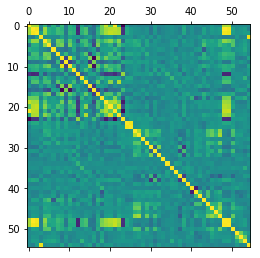

In [31]:
import matplotlib.pyplot as plt

plt.matshow(df.corr())
plt.show()

In [32]:
from itertools import combinations
from mlens.ensemble import SuperLearner
from sklearn.metrics import accuracy_score

seed = 2017
np.random.seed(seed)

[MLENS] backend: threading


In [33]:
direction_label = {
    'STRONG_HIGH' : 5, 
    'HIGH' : 4, 
    'FLAT' : 3,
    'LOW' : 2, 
    'STRONG_LOW' :1
}
df['Direction_label'] = df['Direction'].map(direction_label)
target = ['Direction_label']

x = df[features_baseline].copy()
y = df[target].copy()


noTestingDays = 40

x_train = x_norm[:-noTestingDays]
x_test = x_norm[-noTestingDays:]

y_train = y[:-noTestingDays].values.ravel()
y_test = y[-noTestingDays:]






#         ("LogisticRegression",LogisticRegression()),
#         ("SVC",SVC()),

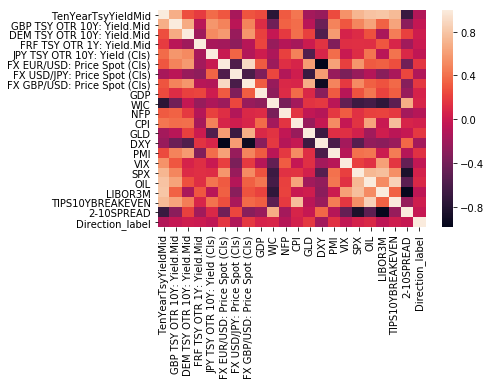

In [34]:
import seaborn as sns
%matplotlib inline

corr = [
            'TenYearTsyYieldMid',
             #'ShiftUp',
             #'Delta',
             'GBP TSY OTR 10Y: Yield.Mid',
             'DEM TSY OTR 10Y: Yield.Mid',
             'FRF TSY OTR 1Y: Yield.Mid',
             'JPY TSY OTR 10Y: Yield (Cls)',
             'FX EUR/USD: Price Spot (Cls)',
             'FX USD/JPY: Price Spot (Cls)',
             'FX GBP/USD: Price Spot (Cls)',
             'GDP',
             'WJC',
             'NFP',
             'CPI',
             'GLD',
             'DXY',
             'PMI',
             'VIX',
             'SPX',
             'OIL',
             'LIBOR3M',
             'TIPS10YBREAKEVEN',
             '2-10SPREAD',
            'Direction_label'
                 #'Direction'
]    
   



# calculate the correlation matrix
corr = df[corr].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)


cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())


In [56]:
# --- Build ---
# Passing a scoring function will create cv scores during fitting
# the scorer should be a simple function accepting to vectors and returning a scalar
ensemble = SuperLearner(scorer=accuracy_score, random_state=seed, verbose=2)

# Build the first layer
# ensemble.add([RandomForestClassifier(random_state=seed), LogisticRegression()])
ensemble.add([("LogisticRegression",LogisticRegression())])
ensemble.add([SVC()])
# Attach the final meta estimator
ensemble.add_meta(LogisticRegression())
ensemble.fit(x_train, y_train)



Fitting 3 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Processing layer-3             done | 00:00:00
Fit complete                        | 00:00:00


SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=9787, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_ex...f6b598>)],
   n_jobs=-1, name='group-12', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=2017, sample_size=20,
       scorer=<function accuracy_score at 0x7f2282f6b598>, shuffle=False,
       verbose=2)

In [57]:
preds = ensemble.predict(x_test)


Predicting 3 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Processing layer-3             done | 00:00:00
Predict complete                    | 00:00:00


In [58]:
accuracy_score(preds, y_test)

0.3